In [52]:
import numpy as np
import os
import matplotlib.pyplot as plt
import math

In [7]:
#input of data
data = 'dataLab1.csv'
results = np.loadtxt(data, delimiter=',')
#print(results)

[[ 1.195  1.64   2.105  2.466  2.734]
 [ 1.149  1.669  2.155  2.431  2.712]
 [ 1.137  1.728  2.148  2.444  2.706]
 [ 1.182  1.712  2.086  2.456  2.709]
 [ 1.168  1.675  2.09   2.435  2.711]
 [ 1.117  1.616  2.002  2.431  2.708]
 [ 1.176  1.55   1.944  2.283  2.701]
 [ 1.111  1.557  1.948  2.32   2.706]
 [ 1.084  1.614  2.018  2.364  2.705]
 [ 1.081  1.592  1.955  2.361  2.7  ]
 [ 1.116  1.615  1.962  2.414  2.701]
 [ 1.134  1.652  2.051  2.363  2.705]
 [ 1.084  1.537  2.035  2.366  2.702]
 [ 1.114  1.588  2.019  2.423  2.701]
 [ 1.083  1.647  2.013  2.425  2.7  ]
 [ 1.047  1.582  2.052  2.452  2.699]
 [ 1.104  1.613  2.034  2.469  2.698]
 [ 1.131  1.612  1.937  2.413  2.704]
 [ 1.145  1.573  2.065  2.41   2.702]
 [ 1.115  1.684  2.057  2.402  2.704]]


In [11]:
#code for question 4
print('#4')
mean = np.mean(results, axis=0)
print('mean')
print(mean)
std = np.std(results, axis=0)
print('std')
print(std)
print('doesnt really agree talk about later')

#4
mean
[ 1.12365  1.6228   2.0338   2.4064   2.7054 ]
std
[ 0.03738218  0.05150495  0.06280812  0.04810135  0.0075921 ]
doesnt really agree talk about later


In [14]:
#def for question 5
def data_generator(mean, std, n_measurements = 500, n_samples = 20):
    """
    Generate an array of measurements from a normal distribution.
    Parameters
    ----------
    mean : float
    Desired mean value of the measurements.
    std : float
    Desired standard deviation of the measurements.
    n_measurements : int, optional
    Number of separate measurements. Default is 500 measurements.
    n_samples : int, optional
    Number of samples taken per measurement. Default is 20 samples.
    per measurement.
    Returns
    -------
    data : numpy.ndarray
    Array representing the experimental data. Each measurement
    (composed of many samples) is a row of this array:
    -----------------------------------
    meas1 | sample0 | sample1 | sample2 | ...
    meas2 | sample0 | sample1 | sample2 | ...
    meas3 | sample0 | sample1 | sample2 | ...
    ...
    """
    return np.random.normal(loc = mean, scale = std, size = (n_measurements, n_samples))

In [36]:
#creating a fake data set for our rolling experiment using std and mean obtained
simdata = data_generator(np.mean(results, axis=0)[4], np.std(results, axis=0)[4])

bins=10


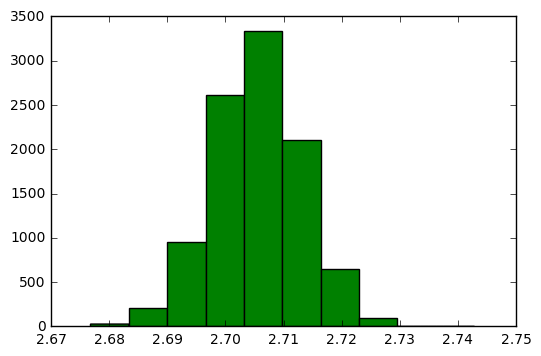

bins=50


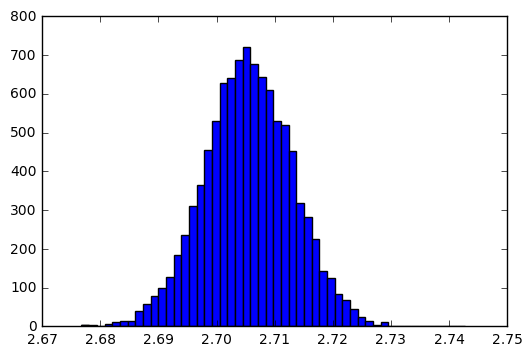

mean
2.70547490012
std
0.00762340496174


In [110]:
#create and save plot
print('bins=10')
plt.hist(np.ravel(simdata), bins=10)
plt.show()
print('bins=50')
histdat, n, _ = plt.hist(np.ravel(simdata), bins=50)
plt.show()
print('mean')
print(np.mean(simdata))
print('std')
print(np.std(simdata))
np.savetxt('fakedata.csv', histdat)

bins=10


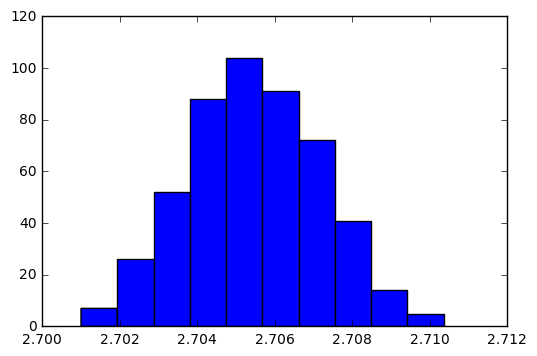

bins=50


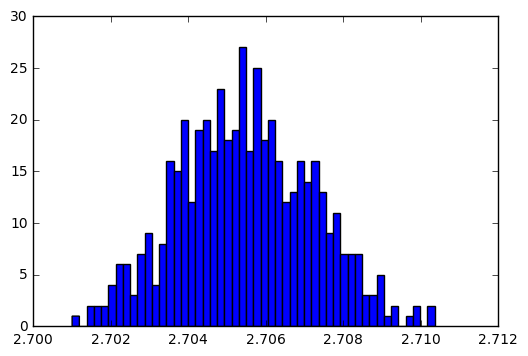

mean
2.70547490012
std
0.00172250318314


In [111]:
#calculation mean of each data set
fkmean = np.mean(simdata, axis=1)
print('bins=10')
plt.hist(fkmean, bins=10)
plt.show()
print('bins=50')
histdat, n, _ = plt.hist(fkmean, bins=50)
plt.show()
print('mean')
print(np.mean(fkmean))
print('std')
print(np.std(fkmean))
np.savetxt('fakedatamean.csv', histdat)

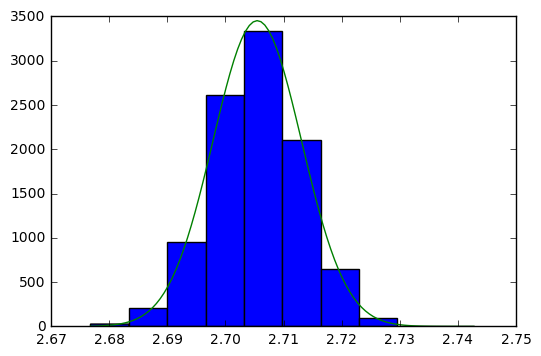

In [88]:
#overlay of gausian function
#start by defining the function
mn = np.mean(simdata)
st = np.std(simdata)
x= np.linspace(np.min(simdata),np.max(simdata),num=100)
prob = (np.exp(-np.power(x - mn,2)/(2*np.power(st,2))))/(st*np.sqrt(2*math.pi))

#get the bin and create the gaussian

n , bins , _= plt.hist(np.ravel(simdata), bins=10)

bn = bins[1]-bins[0]
sampint = bn*np.sum(n)

probnorm = prob*sampint

plt.plot(x,probnorm)
plt.show()

In [94]:
#question 4 
print('our measurments, mean then std')
print(np.mean(results, axis=0)[4])
print(np.std(results, axis=0)[4])
print('generated data, mean then std')
print(np.mean(np.ravel(simdata)))
print(np.std(np.ravel(simdata)))
print('looking at standard error, us vs generated')
print(np.std(results, axis=0)[4]/np.sqrt(20))
print(np.std(np.ravel(simdata))/np.sqrt(20*500))
print('more trials is much much better')

our measurments, mean then std
2.7054
0.00759210115844
generated data, mean then std
2.70547490012
0.00762340496174
looking at standard error, us vs generated
0.00169764542823
7.62340496174e-05
more trials is much much better


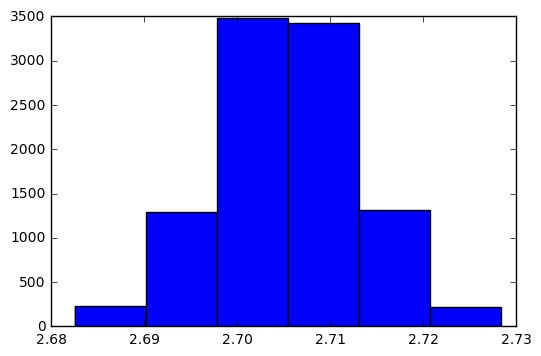

In [112]:
#last part

std = np.std(np.ravel(simdata))
mean = np.mean(np.ravel(simdata))
xrange = (mean - 3*std, mean + 3*std)
histdat1, n, _ = plt.hist(np.ravel(simdata), bins=6, range=xrange)
plt.show()
np.savetxt('6bin.csv',histdat1)

In [124]:
#last question
print('within 1 standard deviation')
tottrials = 20*500
frac1 = (histdat1[2]+histdat1[3])/(tottrials)
print(frac1)

print('within 2 standard deviation')
frac2 = (np.sum(histdat1)-histdat1[0]+histdat1[5])/(tottrials)
print(frac2)

print('within 3 standard deviation')
frac3 = (np.sum(histdat1))/(tottrials)
print(frac3)


within 1 standard deviation
0.6909
within 2 standard deviation
0.9955
within 3 standard deviation
0.9962
